In [1]:
from tensorflow import keras
from tensorflow.keras import layers

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [17]:
data = pd.read_csv('./train.csv')

X = data.copy()
y = X.pop('label')

X = X/255

X_train, X_valid, y_train, y_valid = train_test_split(X,y,stratify=y, test_size = 0.2)

y_train = np.array(y_train).reshape(-1,1)
y_valid = np.array(y_valid).reshape(-1,1)

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
y_train = encoder.fit_transform(y_train)
y_valid = encoder.transform(y_valid)

shape = [X_train.shape[1]]

In [19]:
model = keras.Sequential([
    layers.Dense(256, activation='softplus',input_shape=shape),
    layers.Dropout(0.3),
    layers.Dense(256, activation='softplus'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

early_stopping = keras.callbacks.EarlyStopping(
    patience = 10,
    min_delta = 0.001,
    restore_best_weights = True
)

history = model.fit(
    X_train, y_train,
    validation_data = (X_valid,y_valid),
    batch_size = 512,
    epochs = 25,
    verbose = 0,
    callbacks = [early_stopping]
)

c:\Users\suvra\Files\Code\ML\kaggle\machine_learning\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


<Axes: >

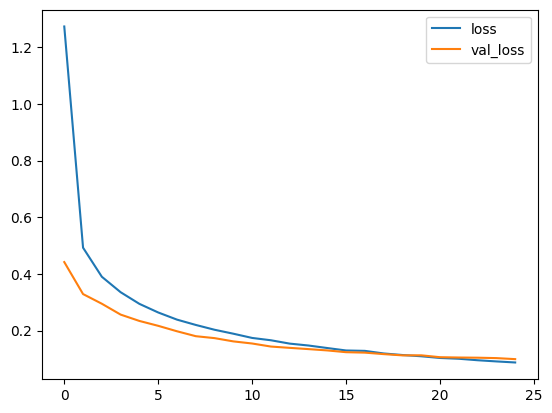

In [21]:
history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5
history_df.loc[0:, ['loss', 'val_loss']].plot()

In [23]:

test = pd.read_csv('./test.csv')
pred_prob = model.predict(test)
preds = np.argmax(pred_prob, axis=1)
results = pd.DataFrame({
    'ImageId': np.arange(1, len(preds) + 1),  # Indexing for 'ImageId' starts from 1
    'label': preds
})
print(results.head())

875/875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
   ImageId  label
0        1      2
1        2      0
2        3      9
3        4      9
4        5      3


In [24]:
results.to_csv('submission.csv',index=False)